<a href="https://www.kaggle.com/code/rubanzasilva/fastai-for-ps-s03e05?scriptVersionId=118634531" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Dataset description

Goal is to predict the quality of wine
The Score between 0 and 10

imports

In [1]:
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!ls /kaggle/input/playground-series-s3e5

sample_submission.csv  test.csv  train.csv


Define dataframe

In [3]:
path = Path('/kaggle/input/playground-series-s3e5')
path

Path('/kaggle/input/playground-series-s3e5')

In [4]:
train_df = pd.read_csv(path/'train.csv', index_col='Id')
test_df = pd.read_csv(path/'test.csv', index_col = 'Id')
sample_df = pd.read_csv(path/'sample_submission.csv', index_col = 'Id')

In [5]:
train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8


In [6]:
train_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

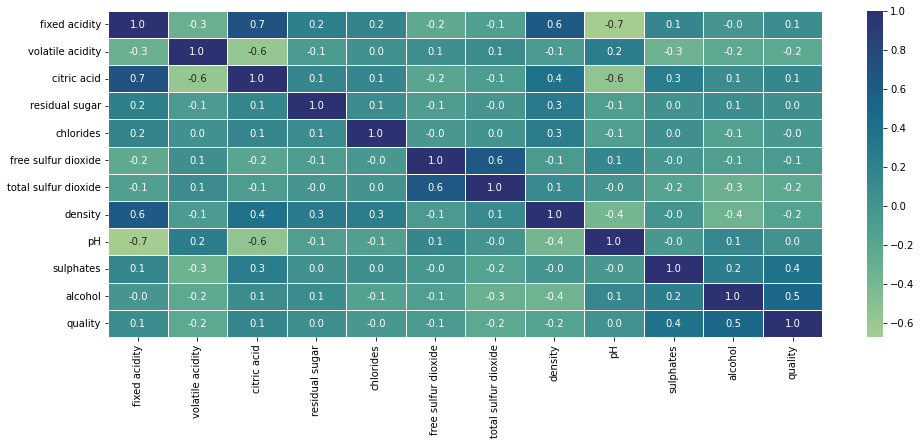

In [7]:
#correlation matrix with heatmap

#set plot size, must be in same cell as train_Corr
plt.figure(figsize=(16,6))
train_corr = sns.heatmap(train_df.corr(), annot=True, fmt=".1f", linewidth=.7, cmap="crest")


**Builing data loaders**

In [8]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, y_names="quality",
    cat_names = None, 
    cont_names = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
    y_block = CategoryBlock,                              
    procs = [Normalize])

In [9]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [10]:
to = TabularPandas(train_df, procs=[Normalize],
                   cat_names = None,
    cont_names = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',],
                   y_names='quality',
                   splits=splits)

In [11]:
to.xs.iloc[:2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
1683,1.589894,0.536918,2.109204,-0.232462,0.075043,-0.590979,-0.285306,0.470277,-1.763212,-0.454074,-1.179223
1371,-0.267081,0.189356,0.452847,-0.353340,-0.123040,0.411507,0.428456,0.296492,-0.284093,-0.157929,-1.275427


In [12]:
dls = to.dataloaders(bs=32)

In [13]:
dls.show_batch()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.500,0.33,3.0,0.102,12.0,62.000000,0.99888,3.24,0.53,10.0,7.0
1,9.4,0.360,0.49,2.1,0.086,27.0,85.000000,0.99640,3.39,0.71,10.9,5.0
2,8.7,0.220,0.40,1.7,0.039,18.0,27.000000,0.99900,3.38,0.87,11.7,7.0
3,6.6,0.705,0.05,1.9,0.076,4.0,15.000000,0.99340,3.42,0.59,10.5,5.0
4,7.3,0.410,0.33,2.5,0.073,17.0,40.000000,0.99630,3.34,0.54,10.1,4.0
5,10.0,0.370,0.31,2.8,0.118,14.0,44.000000,0.99760,2.98,0.56,9.4,5.0
6,6.4,0.330,0.27,2.0,0.058,25.0,42.000000,0.99478,3.44,0.55,11.0,5.0
7,7.7,0.670,0.19,2.8,0.083,22.0,54.000000,0.99736,3.19,0.68,9.5,3.0
8,7.9,0.510,0.18,1.5,0.079,3.0,6.999996,0.99480,3.40,0.64,10.2,5.0
9,8.1,0.580,0.22,2.9,0.071,11.0,119.000000,0.99659,3.22,0.52,9.3,5.0


In [14]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(valley=0.009120108559727669)

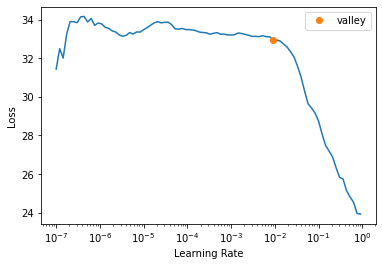

In [15]:
learn.lr_find()

In [16]:
learn.fit_one_cycle(40,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,32.989166,33.023647,0.000000,00:00
1,32.753956,32.491325,0.000000,00:00
2,32.378174,31.812231,0.000000,00:00
3,31.498859,30.247248,0.000000,00:00
4,29.653460,27.430407,0.000000,00:00
5,25.512650,19.460009,0.000000,00:00
6,18.371540,10.230366,0.000000,00:00
7,10.309224,3.285355,0.000000,00:00
8,4.650434,1.104980,0.000000,00:00
9,2.125793,0.893156,0.000000,00:00


In [17]:
learn.show_results()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_pred
0,-0.267081,1.289970,-0.882925,0.613688,0.075043,-0.189985,0.428456,-0.181391,-1.058869,-0.750218,-0.794404,6.0,4.909652
1,-0.789355,-0.158206,-1.417233,-1.199490,-0.083423,-0.089736,-0.493486,0.046675,-0.002356,-1.268471,0.456253,5.0,5.900216
2,0.313223,-1.027112,1.414602,0.251052,-0.202273,-0.891725,-1.028808,-0.757026,-0.565829,-0.528110,1.033481,6.0,5.964892
3,-0.673294,0.478991,-0.028031,-0.111583,-0.083423,0.812501,1.647799,-0.273705,0.561119,-0.750218,-0.698200,5.0,5.316269
4,-0.615264,0.421064,-1.417233,-0.232462,1.422003,-1.192471,-1.147768,-0.203110,0.490685,-0.157929,-0.457689,6.0,5.907619
5,1.880046,-1.316747,1.414602,-0.111583,0.154276,-0.791476,-0.790887,1.013317,-0.565829,2.063156,-0.601996,6.0,6.580943
6,-0.383142,0.478991,-0.348616,-1.199490,0.233509,-0.590979,-0.344786,-0.333456,-0.213659,0.138216,0.360049,7.0,5.755002
7,-1.427690,0.739663,-1.203510,-0.474219,-0.439971,1.012998,0.458196,-0.507209,2.885448,-0.898291,2.380343,6.0,4.836823
8,-0.325111,1.463751,-0.989786,-0.836855,0.075043,-0.089736,0.666377,0.198740,-2.044949,-1.194435,-0.698200,5.0,4.719349


In [18]:
dl = learn.dls.test_dl(test_df)

In [19]:
learn.get_preds(dl=dl)

(tensor([[5.5688],
         [5.8616],
         [5.3852],
         ...,
         [5.2811],
         [5.0730],
         [5.4877]]),
 None)

In [20]:
preds = learn.get_preds(dl=dl)
preds

(tensor([[5.5688],
         [5.8616],
         [5.3852],
         ...,
         [5.2811],
         [5.0730],
         [5.4877]]),
 None)

Submit to kaggle

In [21]:
target_preds = preds[0]

In [22]:
test_df['quality'] = target_preds

test_df.to_csv('submission_y.csv', columns=['quality'], index=True)

submission_y = pd.read_csv('submission_y.csv')
submission_y.head()

,Id,quality
0,2056,5.568815
1,2057,5.861593
2,2058,5.385182
3,2059,5.915764
4,2060,6.653861


The current results being produced by the model are floats while the expeected output is int32 
I figure fastai must be treating this as a regression problem as opposed to classification
Specified CategoryBlock with no change in result

I rounded of below just to be able to make a submission but am still on the lookout for a more effective solution and any contributions will be welcome.

In [23]:
submission_y.dtypes

Id           int64
quality    float64
dtype: object

In [24]:
#our goal is to convert quality that is float64 to int32
submission_y['quality'] = submission_y['quality'].astype(int)
submission_y.dtypes

Id         int64
quality    int64
dtype: object

In [25]:
submission_y.head()

,Id,quality
0,2056,5
1,2057,5
2,2058,5
3,2059,5
4,2060,6


In [26]:
!ls .

__notebook__.ipynb  models  submission_y.csv


In [27]:
import os  
os.makedirs('.', exist_ok=True)  
submission_y.to_csv('submission.csv', index=False)  

In [28]:
submission = pd.read_csv('submission.csv')
submission

,Id,quality
0,2056,5
1,2057,5
2,2058,5
3,2059,5
4,2060,6
...,...,...
1367,3423,5
1368,3424,5
1369,3425,5
1370,3426,5
